### Oleksiy Anokhin (August 11, 2020)

### Analyzing Applications for Permanent Employment Certification Dataset

### MSCA 37014 | Python for Analytics | Professor S. Chaudhary | Team Project

In [122]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set additional parameters
# Remove column display limits
pd.set_option('display.max_columns', None)
# pd.set_option('display.height', None)
pd.set_option('display.max_rows', None)
# pd.set_option('display.width', None)
plt.rcParams['figure.figsize'] = [15, 10]
sns.set_style("white")
plt.rcParams["axes.labelsize"] = 10

In [3]:
# Read data
employment = pd.read_csv('project_data_cleaned.csv')

# Print
employment.head()

,Unnamed: 0,case_status,received_date,decision_date,employer_city,employer_state_province,employer_num_employees,emp_contact_city,emp_contact_state_province,emp_contact_postal_code,agent_attorney_name,agent_attorney_firm_name,pw_skill_level,pw_wage,pw_unit_of_pay,worksite_city,worksite_state,worksite_postal_code,required_experience,required_experience_months,wage_offer_unit_of_pay,pw_soc_code,foreign_language_required,first_newspaper_name,second_newspaper_ad_name,country_of_citizenship,foreign_worker_birth_country,class_of_admission,foreign_worker_education,foreign_worker_info_major,foreign_worker_inst_of_ed
0,0,Denied,9/3/2009,4/30/2020,CHICAGO,ILLINOIS,2.0,chicago,ILLINOIS,60647,Christopher E Kurczaba,Kurczaba Law Offices,Level I,14.49,Hour,Chicago,ILLINOIS,60647,Y,24.0,Hour,43-6011.00,Y,Chicago Tribune,Chicago Tribune,POLAND,POLAND,B-2,High School,GENERAL,LICEUM EKONOMICZNE
1,1,Certified-Expired,3/29/2010,10/18/2019,GERMANTOWN,MARYLAND,0.0,GERMANTOWN,MARYLAND,20874,WINSTON W TSAI,"WINSTON TSAI, ESQ.",Level III,19.36,Hour,BURTONSVILLE,MARYLAND,20866,N,24.0,Hour,49-9042.00,N,WASHINGTON EXAMINER,WASHINGTON EXAMINER,PHILIPPINES,PHILIPPINES,B-2,High School,HIGH SCHOOL,SAN JACINTO NATIONAL HIGH SCHOOL
2,2,Denied,8/10/2010,4/30/2020,N. VALLEY STREAM,NEW YORK,3.0,N. VALLEY STREAM,NEW YORK,11580,DANIEL J SULLIVAN,"DANIEL J. SULLIVAN, ESQ.",Level IV,"78,645.00",Year,North Valley Stream,NEW YORK,11580,Y,24.0,Hour,47-2152.02,N,NY Post,NY Post,EL SALVADOR,EL SALVADOR,EWI,None,NaN,NaN
3,3,Certified,2/3/2011,5/28/2020,CAMPBELL,CALIFORNIA,29.0,Sunnyvale,CALIFORNIA,94086,Sonal Kinger,Baker Law Corporation,Level IV,"131,518.00",Year,Sunnyvale,CALIFORNIA,94086,Y,60.0,Year,15-1031.00,N,San Jose Mercury News,San Jose Mercury News,INDIA,INDIA,H-1B,Other,ELECTRONICS ENGINEERING COMPUTER SCIENCE,SHRI BAHAGUBHAI MAFATLAL POLYTECHNIC INSTITUTE
4,4,Denied,3/10/2011,6/17/2020,YONKERS,NEW YORK,43.0,YONKERS,NEW YORK,10703,VERNON L DUTTON,NON ATTORNEY,Level I,"53,643.00",Year,YONKERS,NEW YORK,10703,Y,24.0,Year,47-1011.01,N,NEW YORK POST,NEW YORK POST,IRELAND,IRELAND,NaN,High School,GENERAL,FALCARRAGH HIGH SCHOOL


**Calculate visas by type and count**

In [4]:
# Check visas by type
print(employment.class_of_admission.value_counts())

H-1B          47142
L-1            5150
F-1            4789
Not in USA     2915
TN             1192
B-2             951
E-2             725
O-1             391
H-4             330
H-2B            304
J-1             303
TPS             302
E-3             236
F-2             227
EWI             195
B-1             170
L-2             133
H-2A            115
E-1             108
Parolee         106
H-1B1            70
P-1              44
A1/A2            44
J-2              26
R-1              19
G-4              14
H-3              12
M-1              10
H-1A              7
O-2               7
C-1               7
I                 7
G-5               6
TD                6
P-3               5
VWT               5
R-2               5
Q                 3
G-1               3
O-3               2
C-3               1
VWB               1
Name: class_of_admission, dtype: int64


AS we can see, H-1B, L-1, and F-1 are dominating categories in our dataset.

In [121]:
# Create a dataframe of top 20 categories
employment_20 = employment.class_of_admission.value_counts().head(20)

# Convert to dataframe
employment_20 = pd.DataFrame(data = employment_20).reset_index()

# Rename columns
employment_20.columns = ['status', 'total_workers']

# Print
employment_20

,status,total_workers
0,H-1B,47142
1,L-1,5150
2,F-1,4789
3,Not in USA,2915
4,TN,1192
5,B-2,951
6,E-2,725
7,O-1,391
8,H-4,330
9,H-2B,304


Text(0.5, 1.0, 'Types of status - 20 most frequent statuses')

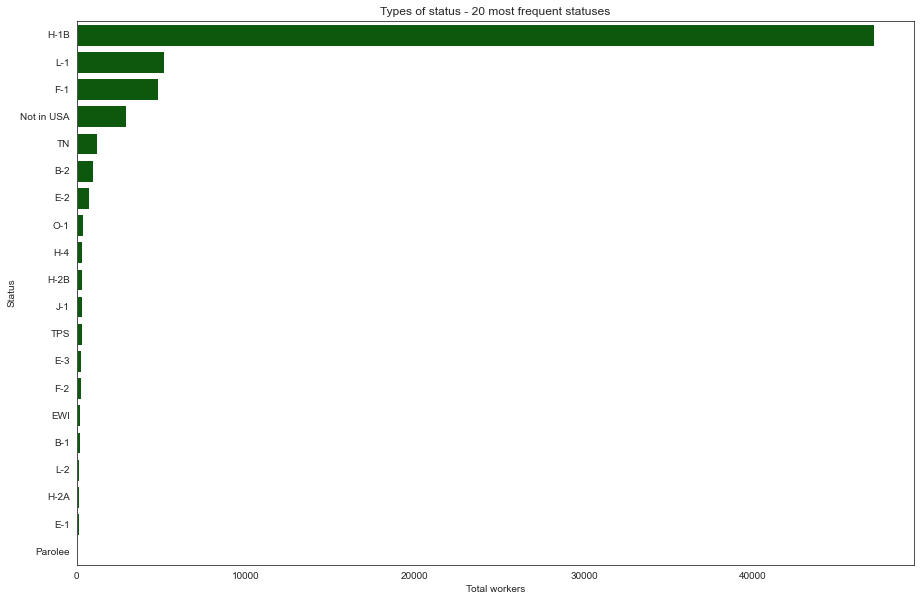

In [125]:
# Create a histogram
ax = sns.barplot(x = "total_workers", y = "status", data = employment_20, color = 'darkgreen')
ax.set(xlabel = 'Total workers', ylabel = 'Status')
ax.set_title('Types of status - 20 most frequent statuses')

**Calculate citizenship by country and type**

In [127]:
# Check visas by type
employment.country_of_citizenship.value_counts().head(20)

INDIA             35089
CHINA              9177
MEXICO             2837
CANADA             2353
SOUTH KOREA        2215
BRAZIL             1459
PHILIPPINES        1441
VIETNAM            1017
VENEZUELA           816
UNITED KINGDOM      762
PAKISTAN            748
TAIWAN              701
NEPAL               645
FRANCE              511
EL SALVADOR         507
TURKEY              494
COLOMBIA            457
BANGLADESH          455
RUSSIA              452
UKRAINE             421
Name: country_of_citizenship, dtype: int64

In [112]:
# Create a dataframe of top 20 categories
citizenship_20 = employment.country_of_citizenship.value_counts().head(20)

# Convert to dataframe
citizenship_20 = pd.DataFrame(data = citizenship_20).reset_index()

# Rename columns
citizenship_20.columns = ['country', 'total_workers']

# Print
citizenship_20

,country,total_workers
0,INDIA,35089
1,CHINA,9177
2,MEXICO,2837
3,CANADA,2353
4,SOUTH KOREA,2215
5,BRAZIL,1459
6,PHILIPPINES,1441
7,VIETNAM,1017
8,VENEZUELA,816
9,UNITED KINGDOM,762


Text(0.5, 1.0, 'Total workers by country')

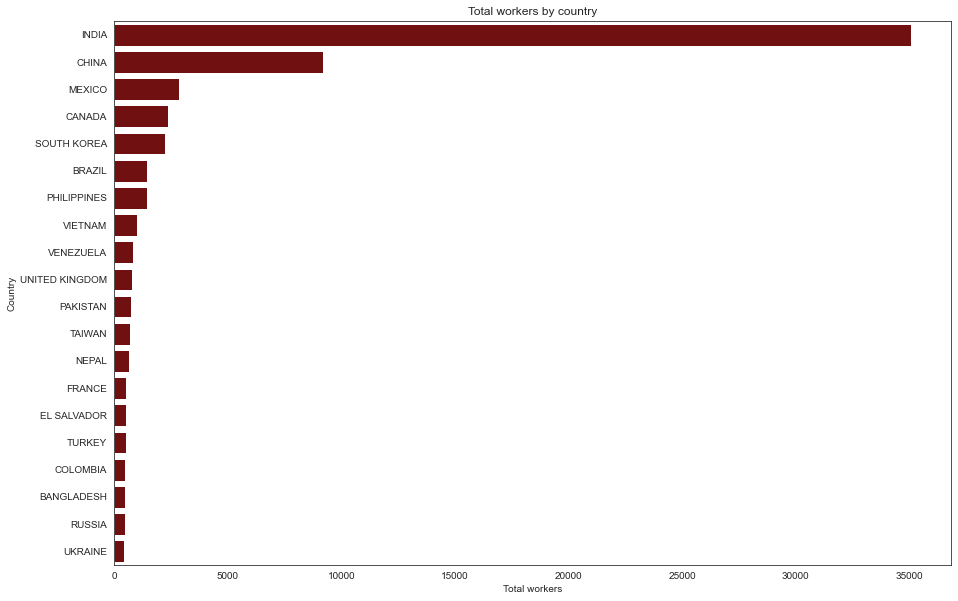

In [126]:
# Create a histogram
ax = sns.barplot(x = 'total_workers', y = 'country', data = citizenship_20, color = 'maroon')
ax.set(xlabel = 'Total workers', ylabel = 'Country')
ax.set_title('Total workers by country')